<h1>Performing Monitoring Analytics on Crime Dataset</h1>

<p>
...def....

</p><p> Import the file. The below operations are same as discussed in Data Preperation.
</p>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
crime_data = pd.read_csv('C:/Users/Sandi/Downloads/Crime1.csv',
                           sep= ',', header= 0)
columnsTitles=['Category', 'Dates', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y']
crime_data=crime_data.reindex(columns=columnsTitles)
crime_data= crime_data[:3000]
# new data frame with split value columns 
new = crime_data["Dates"].str.split(" ", n = 1, expand = True) 
# making seperate date column from Dates Column 
crime_data["Date"]= new[0] 
# making seperate time column from Dates Column 
crime_data["Time"]= new[1] 
# Dropping old Dates columns 
crime_data.drop(columns =["Dates"], inplace = True) 

<p>
...def....

</p><p><strong># BR1: Find the total count of offenses in each category:</strong>
</p>

+-----------------------------+---------+
| Category                    |   Count |
+=============================+=========+
| LARCENY/THEFT               |     821 |
+-----------------------------+---------+
| NON-CRIMINAL                |     379 |
+-----------------------------+---------+
| OTHER OFFENSES              |     354 |
+-----------------------------+---------+
| ASSAULT                     |     242 |
+-----------------------------+---------+
| VEHICLE THEFT               |     205 |
+-----------------------------+---------+
| VANDALISM                   |     134 |
+-----------------------------+---------+
| BURGLARY                    |     127 |
+-----------------------------+---------+
| WARRANTS                    |     112 |
+-----------------------------+---------+
| SUSPICIOUS OCC              |     100 |
+-----------------------------+---------+
| MISSING PERSON              |      99 |
+-----------------------------+---------+
| ROBBERY                     |   

<Figure size 1080x360 with 0 Axes>

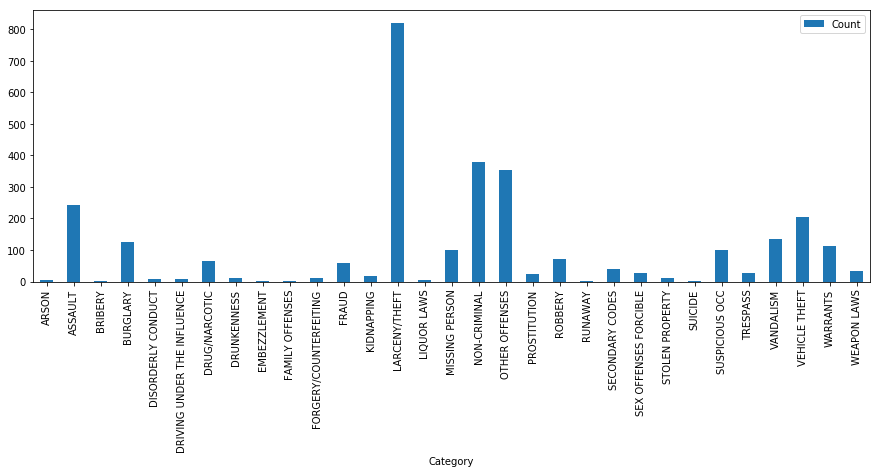

In [1]:
# BR1: Find the total count of offenses in each category
columnsTitles=['Category', 'Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br1 = df_temp.groupby(['Category'], as_index = True).sum()
plt.figure()
plt.rcParams['figure.figsize'] = [15, 5]
df_br1.plot.bar()
df_br1 = df_br1.sort_values(['Count'], ascending = False)
print(tabulate(df_br1, tablefmt="grid", headers="keys"))

<p>
...def....

</p><p><strong># BR2: Find the place of most occurrences of offenses (as a whole and category wise):</strong>
</p>

In [8]:
#BR2: Find the place of most occurrences of offenses (as a whole and category wise)
columnsTitles=['Category', 'Address', 'Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br2_1 = df_temp.groupby(['Address'], as_index = True).sum()

df_br2_2 = df_temp.groupby(['Category','Address'], as_index = False).sum()
df_br2_2 = df_br2_2.sort_values(['Category'], ascending = True)
idx = df_br2_2.groupby(['Category'])['Count'].transform(max) == df_br2_2['Count']
print('\n Maximum count of offenses in the area per category:')
print(tabulate(df_br2_2[idx], tablefmt="grid", headers="keys"))

print('Maximum count of offense in the area:')
print(df_br2_1.loc[df_br2_1['Count'].idxmax()])


 Maximum count of offenses in the area per category:
+------+-----------------------------+-----------------------------+---------+
|      | Category                    | Address                     |   Count |
+======+=============================+=============================+=========+
|    0 | ARSON                       | 1400 Block of SELBY ST      |       1 |
+------+-----------------------------+-----------------------------+---------+
|    1 | ARSON                       | 1800 Block of MARKET ST     |       1 |
+------+-----------------------------+-----------------------------+---------+
|    2 | ARSON                       | 200 Block of 11TH AV        |       1 |
+------+-----------------------------+-----------------------------+---------+
|    3 | ARSON                       | 200 Block of FOLSOM ST      |       1 |
+------+-----------------------------+-----------------------------+---------+
|    4 | ARSON                       | 200 Block of MCALLISTER ST  |       1 

<p>
...def....

</p><p><strong># BR3: Find the District having highest number of offenses (as a whole and category wise):</strong>
</p>

Maximum number of offenses in the District:
Count    525
Name: SOUTHERN, dtype: int64

Maximum number of offenses in the District per category:
+-----+-----------------------------+--------------+---------+
|     | Category                    | PdDistrict   |   Count |
+=====+=============================+==============+=========+
|  81 | LARCENY/THEFT               | SOUTHERN     |     195 |
+-----+-----------------------------+--------------+---------+
| 114 | OTHER OFFENSES              | SOUTHERN     |      62 |
+-----+-----------------------------+--------------+---------+
|  98 | NON-CRIMINAL                | CENTRAL      |      56 |
+-----+-----------------------------+--------------+---------+
|   7 | ASSAULT                     | MISSION      |      48 |
+-----+-----------------------------+--------------+---------+
| 191 | VEHICLE THEFT               | MISSION      |      37 |
+-----+-----------------------------+--------------+---------+
| 185 | VANDALISM                   |

<Figure size 1080x360 with 0 Axes>

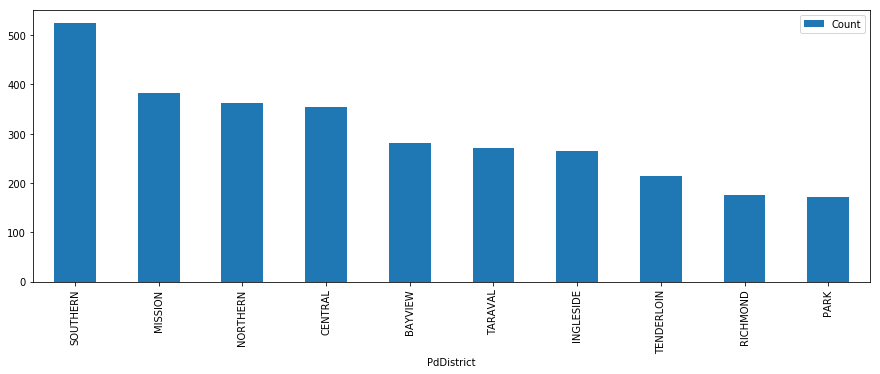

In [9]:
#BR3: Find the District having highest number of offenses (as a whole and category wise)
columnsTitles=['Category', 'PdDistrict', 'Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br3_1 = df_temp.groupby(['PdDistrict'], as_index = True).sum()
print('Maximum number of offenses in the District:')
print(df_br3_1.loc[df_br3_1['Count'].idxmax()])
df_br3_2 = df_temp.groupby(['Category','PdDistrict'], as_index = False).sum()
df_br3_2 = df_br3_2.sort_values(['Count'], ascending = False)
idx = df_br3_2.groupby(['Category'])['Count'].transform(max) == df_br3_2['Count']
print('\nMaximum number of offenses in the District per category:')
print(tabulate(df_br3_2[idx], tablefmt="grid", headers="keys"))

columnsTitles=['PdDistrict', 'Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br3_3 = df_temp.groupby(['PdDistrict'], as_index = True).sum()
df_br3_3 = df_br3_3.sort_values(['Count'], ascending = False)
print('\nTotal count of offenses in districts')
print(tabulate(df_br3_3, tablefmt="grid", headers="keys"))
plt.figure()
df_br3_3.plot.bar()

<p>
...def....

</p><p><strong># BR4: Frequency of offences depending on the day of the week:</strong>
</p>

Maximum count of offenses in the DayOfWeek:
Count    689
Name: Wednesday, dtype: int64

Maximum count of offenses in the DayOfWeek per category:
+-----+-----------------------------+-------------+---------+
|     | Category                    | DayOfWeek   |   Count |
+=====+=============================+=============+=========+
|  66 | LARCENY/THEFT               | Wednesday   |     196 |
+-----+-----------------------------+-------------+---------+
|  84 | NON-CRIMINAL                | Wednesday   |      85 |
+-----+-----------------------------+-------------+---------+
|  91 | OTHER OFFENSES              | Wednesday   |      85 |
+-----+-----------------------------+-------------+---------+
|  10 | ASSAULT                     | Wednesday   |      52 |
+-----+-----------------------------+-------------+---------+
| 152 | VEHICLE THEFT               | Wednesday   |      45 |
+-----+-----------------------------+-------------+---------+
| 159 | WARRANTS                    | Wednesday  

<Figure size 1080x360 with 0 Axes>

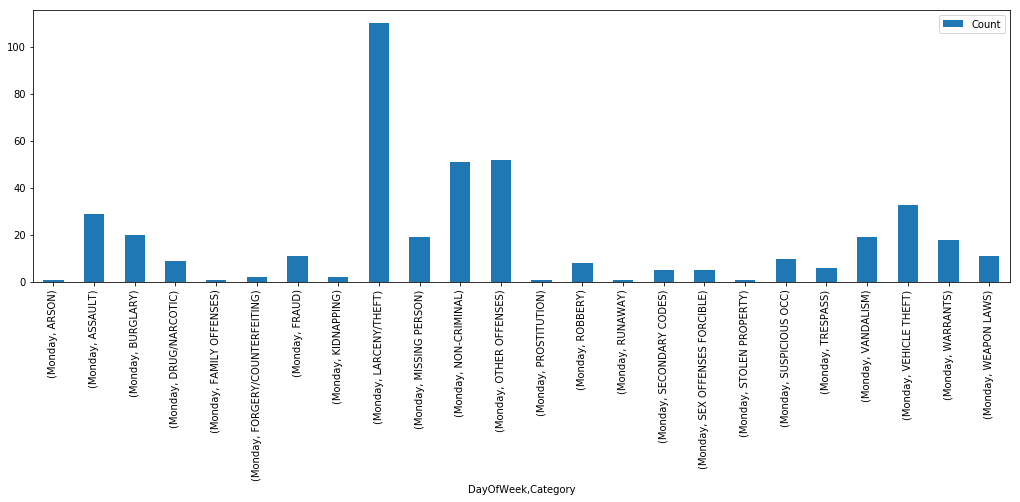

<Figure size 1260x360 with 0 Axes>

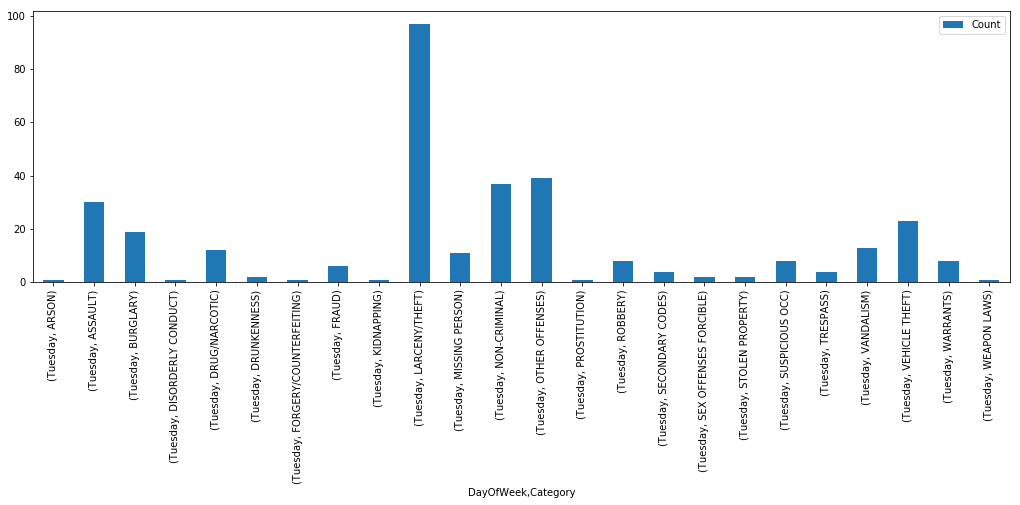

<Figure size 1260x360 with 0 Axes>

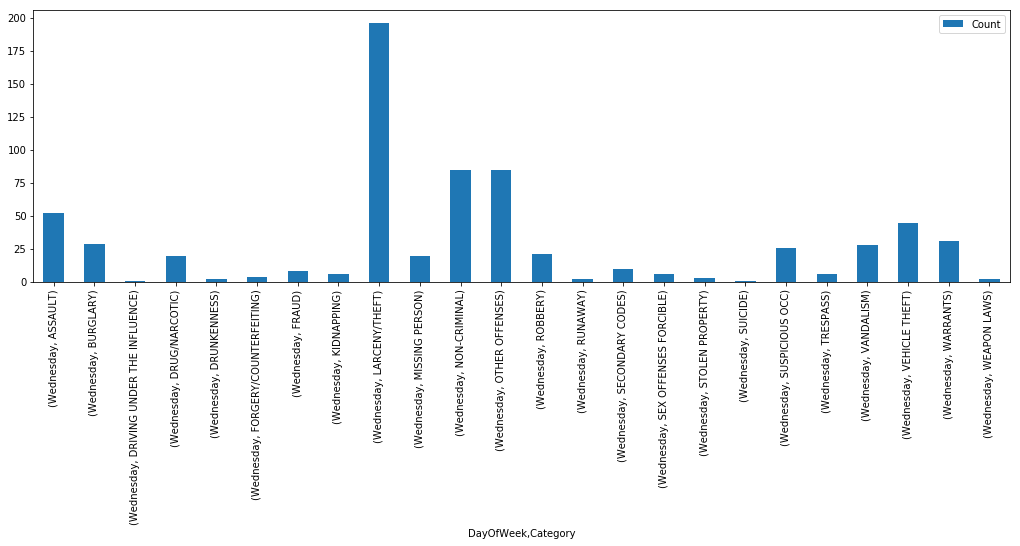

<Figure size 1260x360 with 0 Axes>

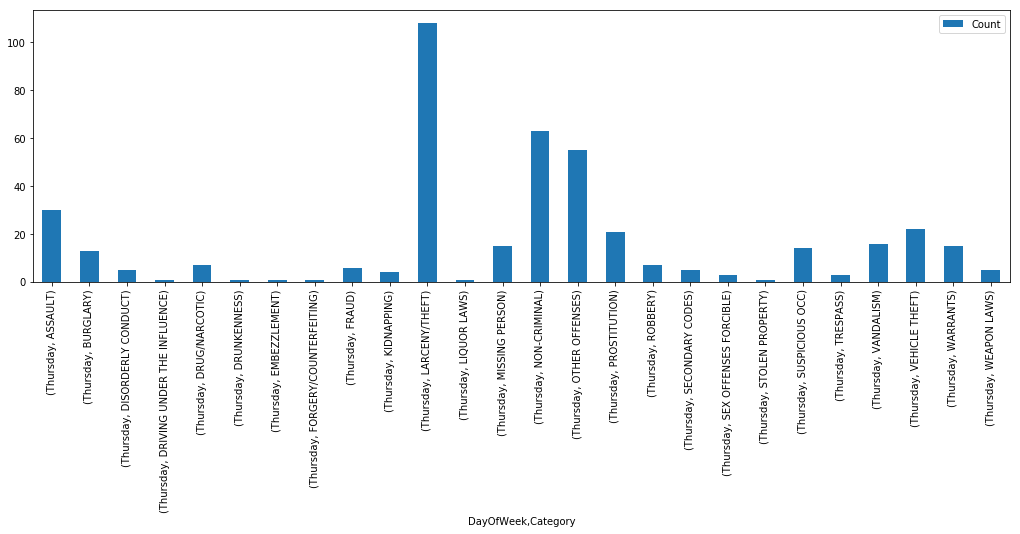

<Figure size 1260x360 with 0 Axes>

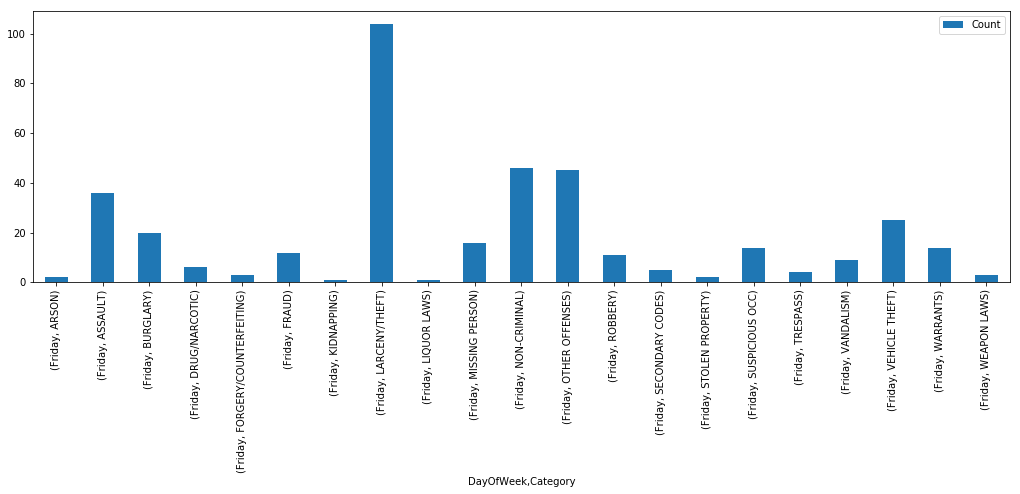

<Figure size 1260x360 with 0 Axes>

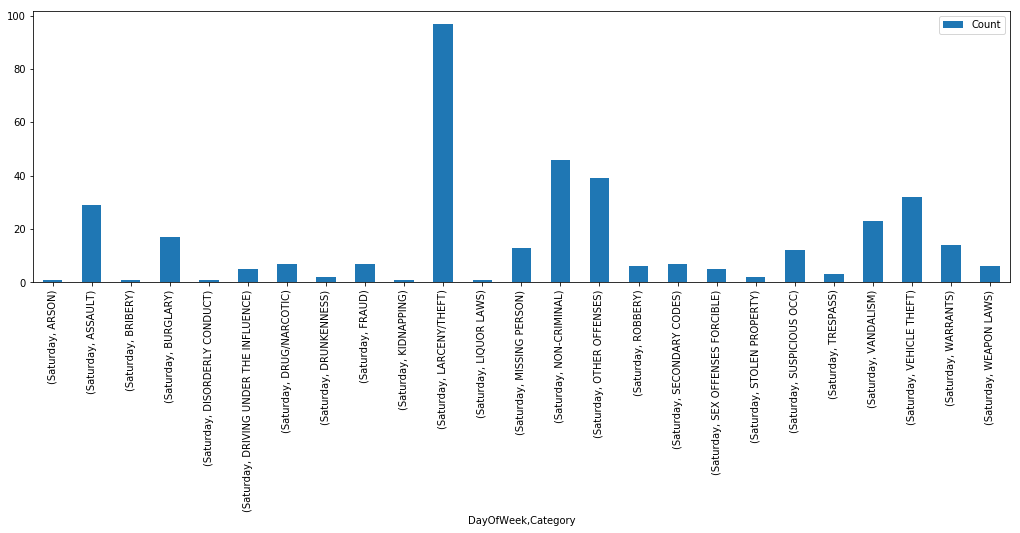

<Figure size 1260x360 with 0 Axes>

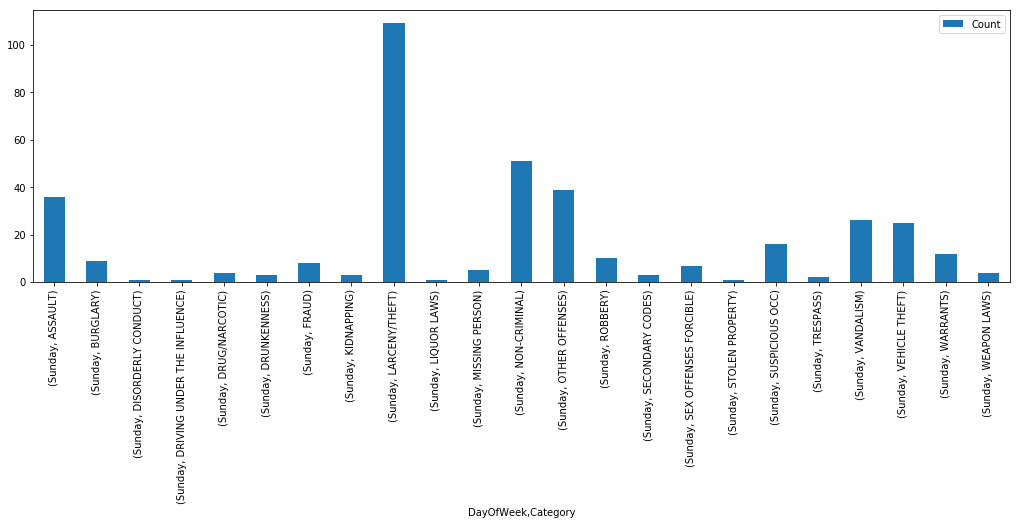

<Figure size 1260x360 with 0 Axes>

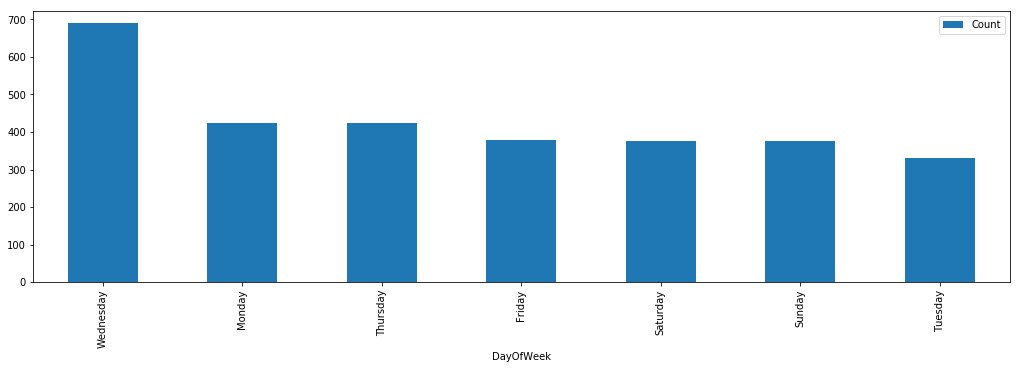

In [10]:
# BR4 Frequency of offences depending on the day of the week

def PlotCrimeDay(df, day):
    df_pcd = df.loc[(df['DayOfWeek'] == day)]
    df_pcd = df_pcd.groupby(['DayOfWeek','Category'], as_index = True).sum()
    
    plt.figure()
    plt.rcParams['figure.figsize'] = [17.5, 5]
    df_pcd.plot.bar()
    

columnsTitles=['Category', 'DayOfWeek','Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
PlotCrimeDay(df_temp, 'Monday')
PlotCrimeDay(df_temp, 'Tuesday')
PlotCrimeDay(df_temp, 'Wednesday')
PlotCrimeDay(df_temp, 'Thursday')
PlotCrimeDay(df_temp, 'Friday')
PlotCrimeDay(df_temp, 'Saturday')
PlotCrimeDay(df_temp, 'Sunday')

df_br4_1 = df_temp.groupby(['DayOfWeek'], as_index = True).sum()
print('Maximum count of offenses in the DayOfWeek:')
print(df_br4_1.loc[df_br4_1['Count'].idxmax()])
df_br4_2 = df_temp.groupby(['Category','DayOfWeek'], as_index = False).sum()
df_br4_2 = df_br4_2.sort_values(['Count'], ascending = False)
idx = df_br4_2.groupby(['Category'])['Count'].transform(max) == df_br4_2['Count']
print('\nMaximum count of offenses in the DayOfWeek per category:')
print(tabulate(df_br4_2[idx], tablefmt="grid", headers="keys"))

columnsTitles=['DayOfWeek', 'Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br4_3 = df_temp.groupby(['DayOfWeek'], as_index = True).sum()
df_br4_3 = df_br4_3.sort_values(['Count'], ascending = False)
print('\nTotal count of offenses per day')
print(tabulate(df_br4_3, tablefmt="grid", headers="keys"))
plt.figure()
df_br4_3.plot.bar()

<p>
...def....

</p><p><strong># BR5: Find the Day of the week in a District/Address where a certain category of offense is more:</strong>
</p>

In [11]:
# BR5: Find the Day of the week in a District/Address where a certain category of offense is more.

def daycrimecount(df, day):
    print('\n')
    df_br5_dcc = df.loc[(df['DayOfWeek'] == day)]
    df_br5_dcc = df_br5_dcc.groupby(['DayOfWeek','Category','PdDistrict','Address'], as_index = True).sum().sort_values(['Count'], ascending = False)
    print(df_br5_dcc.loc[(df_br5_dcc['Count'] >1)])

from pandas.api.types import CategoricalDtype

columnsTitles=['Category', 'DayOfWeek','PdDistrict','Address','Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
print('Offenses at loction w.r.t. DayOfWeek:')
daycrimecount(df_temp, 'Monday')
daycrimecount(df_temp, 'Tuesday')
daycrimecount(df_temp, 'Wednesday')
daycrimecount(df_temp, 'Thursday')
daycrimecount(df_temp, 'Friday')
daycrimecount(df_temp, 'Saturday')
daycrimecount(df_temp, 'Sunday')

Offenses at loction w.r.t. DayOfWeek:


                                                                 Count
DayOfWeek Category       PdDistrict Address                           
Monday    LARCENY/THEFT  CENTRAL    2300 Block of STOCKTON ST        4
                         SOUTHERN   800 Block of MARKET ST           3
          NON-CRIMINAL   TENDERLOIN 500 Block of JONES ST            3
          WEAPON LAWS    BAYVIEW    1300 Block of THOMAS AV          3
          MISSING PERSON SOUTHERN   0 Block of DORE ST               2
                         INGLESIDE  200 Block of CAYUGA AV           2
          WARRANTS       BAYVIEW    1100 Block of FITZGERALD AV      2
          MISSING PERSON TARAVAL    300 Block of STRATFORD DR        2
          BURGLARY       INGLESIDE  600 Block of PERALTA AV          2
          SUSPICIOUS OCC INGLESIDE  0 Block of LELAND AV             2
          MISSING PERSON SOUTHERN   0 Block of MOSS ST               2
          LARCENY/THEFT  SOUTHERN   9

<p>
...def....

</p><p><strong># BR6: Depict Resolution of cases in percentage w.r.t. category / day of week / district / address:</strong>
</p>

+----------------------------------------+---------+
| Resolution                             |   Count |
+========================================+=========+
| ARREST, BOOKED                         |     716 |
+----------------------------------------+---------+
| ARREST, CITED                          |      21 |
+----------------------------------------+---------+
| CLEARED-CONTACT JUVENILE FOR MORE INFO |       2 |
+----------------------------------------+---------+
| EXCEPTIONAL CLEARANCE                  |      10 |
+----------------------------------------+---------+
| JUVENILE BOOKED                        |      15 |
+----------------------------------------+---------+
| LOCATED                                |       2 |
+----------------------------------------+---------+
| NONE                                   |    2196 |
+----------------------------------------+---------+
| PSYCHOPATHIC CASE                      |       5 |
+----------------------------------------+----

<Figure size 1260x360 with 0 Axes>

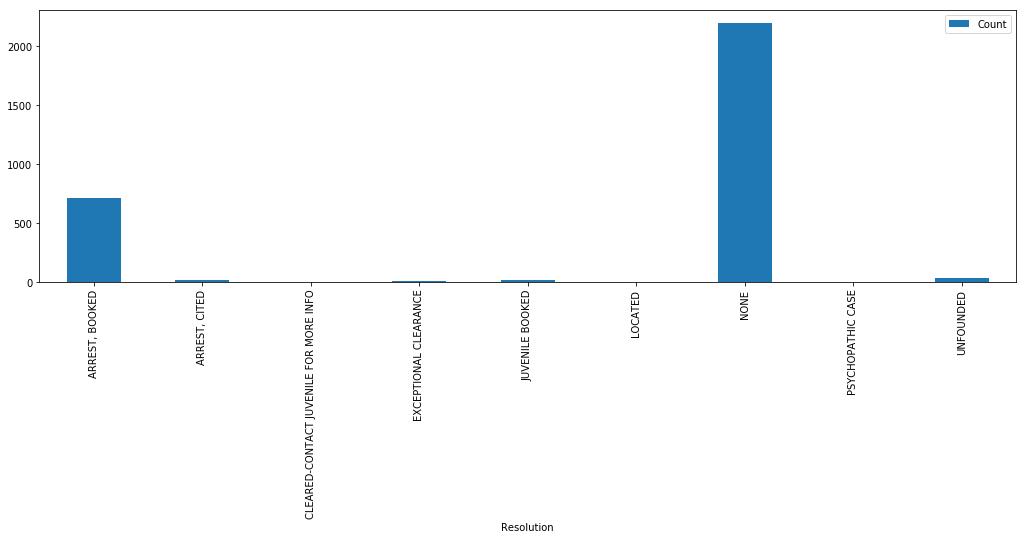

In [12]:
#BR6: Depict Resolution of cases in percentage w.r.t. category / day of week / district / address
def plotRes(df, col):
    columnTitles = ['Resolution',col,'Count']
    df_br7_pr = df.reindex(columns=columnsTitles)
    df_br7_pr = df_br7_pr.groupby(['Resolution',col], as_index = True).sum().reset_index()
    
    print(tabulate(df_br7_pr, tablefmt="grid", headers="keys"))
    df = df_br7_pr.pivot(index='Resolution', columns=col)
    
    print(df)

columnsTitles=['Category', 'DayOfWeek','PdDistrict','Address','Resolution','Count']
df_temp = crime_data.reindex(columns=columnsTitles)
df_temp['Count'] = 1
df_br7 = df_temp.groupby(['Resolution'], as_index = True).sum()

print(tabulate(df_br7, tablefmt="grid", headers="keys"))

plt.figure()
df_br7.plot.bar()

plotRes(df_temp, 'DayOfWeek')
plotRes(df_temp, 'PdDistrict')